# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\gacov\documents\bootcamp\bootcamp\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#creating the url for the data retrieving 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"




In [6]:
response = requests.get('http://api.openweathermap.org/data/2.5/weather?units=metric&appid=91ecd237260f0ed6534951e42f752757&q=ixtapa')
response.json()

{'coord': {'lon': -105.2, 'lat': 20.7},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 31.84,
  'feels_like': 35.82,
  'temp_min': 31.67,
  'temp_max': 32,
  'pressure': 1008,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 4.1, 'deg': 220},
 'clouds': {'all': 5},
 'dt': 1603745121,
 'sys': {'type': 1,
  'id': 7156,
  'country': 'MX',
  'sunrise': 1603717228,
  'sunset': 1603758522},
 'timezone': -21600,
 'id': 4004293,
 'name': 'Ixtapa',
 'cod': 200}

In [7]:
#preparing empty lists to host the data retreived 
cityname = []
country = []
temperaturemax = []
humidity = []
cloudiness = []
windspeed = []
date = []
lat = []
lng = []



#looping thorough all the cities generated in the list some steps above

print('Beginning Data Retrieval')
i = 0
for city in cities:
    endpoint = f"{url}units={units}&appid={weather_api_key}&q={city}"
    response = requests.get(endpoint).json()
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        cityname.append(response['name'])
        country.append(response['sys']['country'])
        temperaturemax.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        print(f'Processing Record {i}  | {city}')
    else:
        print(f'City not found. Skipping...')
    
print('Data Retrieval Complete')
    
    

Beginning Data Retrieval
City not found. Skipping...
Processing Record 1  | hithadhoo
Processing Record 2  | jamestown
Processing Record 3  | albany
Processing Record 4  | presidencia roque saenz pena
Processing Record 5  | bredasdorp
Processing Record 6  | kyra
Processing Record 7  | carnarvon
Processing Record 8  | camacha
Processing Record 9  | ulladulla
Processing Record 10  | kapaa
Processing Record 11  | marsa matruh
Processing Record 12  | busselton
Processing Record 13  | avarua
Processing Record 14  | tual
Processing Record 15  | hasaki
City not found. Skipping...
Processing Record 16  | cape town
Processing Record 17  | punta arenas
Processing Record 18  | husavik
Processing Record 19  | oga
City not found. Skipping...
Processing Record 20  | dornoch
Processing Record 21  | yeppoon
Processing Record 22  | amapa
Processing Record 23  | maniitsoq
Processing Record 24  | ushuaia
Processing Record 25  | turangi
Processing Record 26  | narsaq
City not found. Skipping...
Processing

Processing Record 227  | baculin
Processing Record 228  | chipiona
Processing Record 229  | roscommon
Processing Record 230  | ambilobe
Processing Record 231  | port hardy
Processing Record 232  | oskaloosa
Processing Record 233  | friedland
Processing Record 234  | kaeo
Processing Record 235  | ponta do sol
Processing Record 236  | ketchikan
Processing Record 237  | gbadolite
Processing Record 238  | sechura
Processing Record 239  | chipinge
Processing Record 240  | mahanoro
Processing Record 241  | auki
Processing Record 242  | provideniya
Processing Record 243  | sur
Processing Record 244  | vung tau
Processing Record 245  | la orilla
City not found. Skipping...
Processing Record 246  | ionia
Processing Record 247  | faya
Processing Record 248  | lesosibirsk
City not found. Skipping...
Processing Record 249  | douglas
Processing Record 250  | ville-marie
Processing Record 251  | buraydah
Processing Record 252  | emet
Processing Record 253  | mananara
Processing Record 254  | cayenne

City not found. Skipping...
Processing Record 450  | nador
Processing Record 451  | mnogovershinnyy
Processing Record 452  | baykit
Processing Record 453  | pathein
Processing Record 454  | lulea
Processing Record 455  | kananga
Processing Record 456  | adrar
Processing Record 457  | samarai
Processing Record 458  | mumford
Processing Record 459  | dunedin
Processing Record 460  | coari
Processing Record 461  | pitimbu
Processing Record 462  | saint-georges
Processing Record 463  | lemoore
Processing Record 464  | kodinsk
Processing Record 465  | charters towers
City not found. Skipping...
Processing Record 466  | necochea
Processing Record 467  | ancud
Processing Record 468  | saint-augustin
Processing Record 469  | hudson bay
City not found. Skipping...
Processing Record 470  | velyka oleksandrivka
Processing Record 471  | lahij
Processing Record 472  | izhma
Processing Record 473  | saint-pierre
Processing Record 474  | margate
Processing Record 475  | aklavik
Processing Record 476 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weatherdict = {
    "City": cityname,
    "Country": country,
    "Temperature": temperaturemax,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Date": date,
    "Wind Speed": windspeed,
    "Lat": lat,
    "Lng": lng, 
}

weatherdf = pd.DataFrame(weatherdict)
weatherdf

,City,Country,Temperature,Humidity,Cloudiness,Date,Wind Speed,Lat,Lng
0,Hithadhoo,MV,28.43,66,45,1603745129,3.30,-0.60,73.08
1,Jamestown,US,8.33,93,90,1603745129,3.10,42.10,-79.24
2,Albany,US,10.00,83,100,1603745081,0.45,42.60,-73.97
3,Presidencia Roque Sáenz Peña,AR,24.55,52,0,1603745130,3.65,-26.79,-60.44
4,Bredasdorp,ZA,18.00,82,100,1603745130,6.70,-34.53,20.04
...,...,...,...,...,...,...,...,...,...
569,Geilo,NO,1.67,89,100,1603745252,1.41,60.53,8.21
570,Mackay,AU,21.00,94,90,1603745088,3.10,-21.15,149.20
571,Sterling,US,16.67,82,75,1603745253,1.50,39.01,-77.43
572,Dalbandin,PK,12.64,31,0,1603745253,0.20,28.89,64.41


In [9]:
weatherdf.to_csv('Weatherdf.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

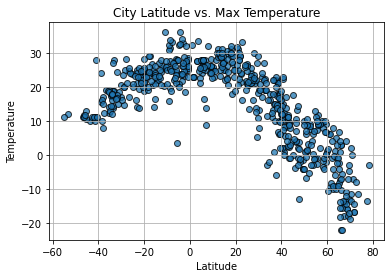

<Figure size 432x288 with 0 Axes>

In [10]:
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.scatter(lat, temperaturemax, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("Lat vs Temperature.png")

#### Latitude vs. Humidity Plot

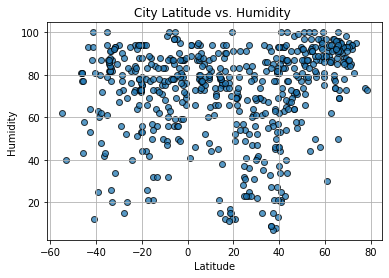

<Figure size 432x288 with 0 Axes>

In [11]:
plt.title(f"City Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(lat, humidity, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("Lat vs Humidity.png")

#### Latitude vs. Cloudiness Plot

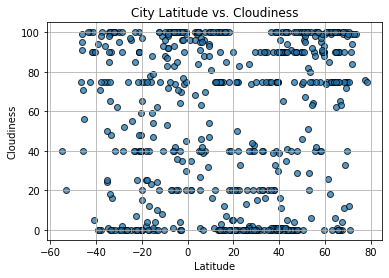

<Figure size 432x288 with 0 Axes>

In [12]:
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(lat, cloudiness, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("Lat vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

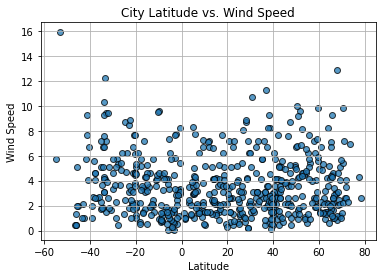

<Figure size 432x288 with 0 Axes>

In [13]:
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(lat, windspeed, alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("Lat vs Wind Speed.png")

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
north = weatherdf.loc[weatherdf["Lat"] >= 0.0]
north.reset_index(inplace=True)

south = weatherdf.loc[weatherdf["Lat"] < 0.0]
south.reset_index(inplace=True)

In [15]:
# OPTIONAL: Create a function to create Linear Regression plot
def plotregression(x_values, y_values, x_label,y_label,pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,pos,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7698642454716897


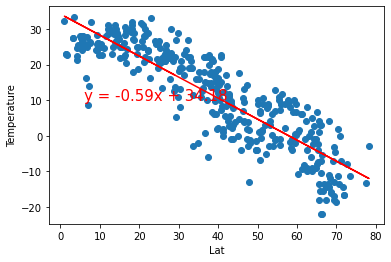

As expected, the Latitude and the Temperature are variables that, when applied into a linear regression analysis, return an r-squared of 76% which tells us that the model has some degree of effectivity. The higher the Latitude, the lower the Temperature in the North emisphere.


In [34]:
x_label = "Lat"
y_label = "Temperature"
pos = (6,10)
plotregression(north[x_label],north[y_label],x_label,y_label,pos)
print(f"As expected, the Latitude and the Temperature are variables that, when applied into a linear regression analysis, return an r-squared of 76% which tells us that the model has some degree of effectivity. The higher the Latitude, the lower the Temperature in the North emisphere.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4915536546115143


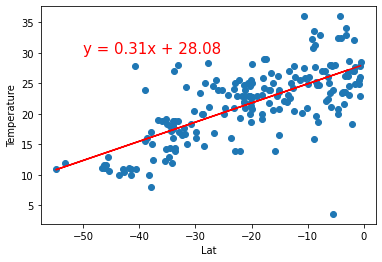

Similar to the case of the North emisphere, the linear regression analysis has certain predicting effectivity in the Southern emisphere, denoted by the r-squared.


In [37]:
x_label = "Lat"
y_label = "Temperature"
pos = (-50,30)
plotregression(south[x_label],south[y_label],x_label,y_label,pos)
print(f"Similar to the case of the North emisphere, the linear regression analysis has certain predicting effectivity in the Southern emisphere, denoted by the r-squared.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08774588138741701


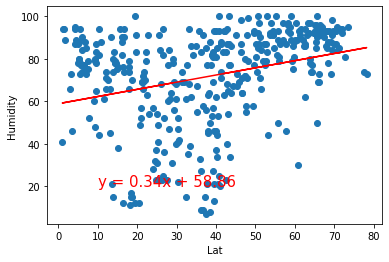

opposite to the previous two cases, the humidity and the latitude seem to be not related and the linear regression model is not effective to reach any meaningful conclustion in terms of relation between these two variables.


In [38]:
x_label = "Lat"
y_label = "Humidity"
pos = (10,20)
plotregression(north[x_label],north[y_label],x_label,y_label,pos)
print(f"Opposite to the previous two cases, the humidity and the latitude seem to be not related and the linear regression model is not effective to reach any meaningful conclustion in terms of relation between these two variables.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0035858787806934897


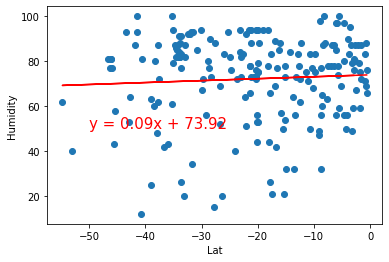

In this plot we can see that it is difficult to establish a correlation between the Latitude of each of the cities and the Humidity. This is also reinforced by the very low r-squared obtained


In [25]:
x_label = "Lat"
y_label = "Humidity"
pos = (-50,50)
plotregression(south[x_label],south[y_label],x_label,y_label,pos)
print(f"In this plot we can see that it is difficult to establish a correlation between the Latitude of each of the cities and the Humidity. This is also reinforced by the very low r-squared obtained")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03671686683729687


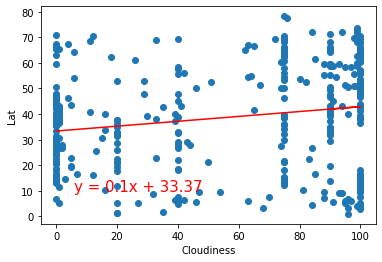

In this plot we also see that is is very difficult to establish a relation between Latitude of each of the cities and its cloudiness level. Similar to the previous case, the r-squared is low, denoting the low prediction effectivity of the regression model.


In [28]:
x_label = "Cloudiness"
y_label = "Lat"
pos = (6,10)
plotregression(north[x_label],north[y_label],x_label,y_label,pos)
print(f"In this plot we also see that is is very difficult to establish a relation between Latitude of each of the cities and its cloudiness level. Similar to the previous case, the r-squared is low, denoting the low prediction effectivity of the regression model.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0001103892573346297


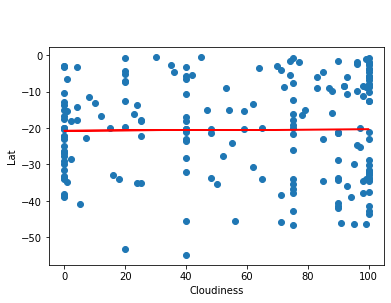

Similarly to the previous two cases, the effectivity to predict the Humidity


In [30]:
x_label = "Cloudiness"
y_label = "Lat"
pos = (6,10)
plotregression(south[x_label],south[y_label],x_label,y_label, pos)
print(f"Similarly to the previous two cases, the effectivity to predict the Latitude by having the Cloudiness is very low, evidenced by the low r-squared obtained.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010662230492144016


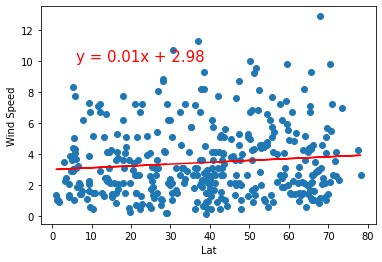

Once again, the r-squared denotes a poor prediction accuracy between wind speed and latitude


In [31]:
x_label = "Lat"
y_label = "Wind Speed"
pos = (6,10)
plotregression(north[x_label],north[y_label],x_label,y_label,pos)
print(f"Once again, the r-squared denotes a poor prediction accuracy between wind speed and latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.052163705495905675


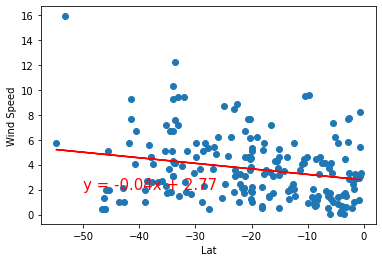

Once again, the r-squared denotes a poor prediction accuracy between wind speed and latitude


In [32]:
x_label = "Lat"
y_label = "Wind Speed"
pos = (-50,2)
plotregression(south[x_label],south[y_label],x_label,y_label,pos)
print(f"Once again, the r-squared denotes a poor prediction accuracy between wind speed and latitude")